#  Exploratory Data Analysis of Aphex Twin's Music Using Spotify Metrics


This notebook analyzes Aphex Twin’s music using Spotify’s audio features. It explores various metrics, such as energy, Valence and Danceability, to understand their relationship with track characteristics and popularity.

The analysis involves calculating custom "Bangerness" and "Ambientness" scores to assess track intensity and atmosphere. Additionally, the analysis examines how features such as energy and acousticness correlate with track popularity.



The initial dataset was compiled using Spotify's API, covering all available Aphex Twin tracks and their associated features. [The code used to generate this dataset can be found here](https://github.com/iftah-og/afx_eda/blob/main/spot_to_df.ipynb).

In [1]:
# Import necessary stuff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [114]:
# Load the dataset from the specified URL 
url = 'https://raw.githubusercontent.com/iftah-og/afx_eda/main/afx_c.csv'
df = pd.read_csv(url)
print('df shape is', df.shape)
df.head()


df shape is (118, 18)


,Unnamed: 0,Track Name,Album Name,Track ID,Popularity,Tempo (BPM),Duration (s),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Release Date
0,0,Digeridoo - 2022 Remaster,Digeridoo (Expanded Edition),2Fh8MjqWLFCoiOOHQRfqgq,40,146.092,432.938,0.519,0.977,10,-8.057,0,0.0544,0.774000,0.855,0.114,0.568,2024-05-31
1,1,Flap Head - 2022 Remaster,Digeridoo (Expanded Edition),24nMZbhkJNqJ70P1J81ZNx,35,136.244,420.766,0.566,0.995,1,-7.022,1,0.0503,0.151000,0.886,0.399,0.592,2024-05-31
2,2,Phloam - 2022 Remaster,Digeridoo (Expanded Edition),2jft0p7lZNXkKksCFHbsKr,32,135.880,333.535,0.525,0.977,10,-8.163,0,0.1310,0.000882,0.440,0.145,0.238,2024-05-31
3,3,Isoprophlex - 2022 Remaster,Digeridoo (Expanded Edition),1U3W1jTqreI3YL84sA1eCx,30,135.609,383.964,0.646,0.914,1,-9.003,0,0.0730,0.234000,0.768,0.039,0.339,2024-05-31
4,4,Digeridoo - Cr7E Version,Digeridoo (Expanded Edition),2Ujum3PkQL0x3QMnGoJGPf,34,142.844,445.314,0.533,0.972,7,-8.425,1,0.0521,0.765000,0.906,0.123,0.415,2024-05-31


## Danceability: is the sole presence of drums enough?

The first thing I wanted to explore was how "Danceability" translates into real-life listening. According to spotify, *"Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."* I sorted the data frame to highlight the most danceable tracks according to Spotify's metrics, and the results were surprising. For instance, I've always appreciated the eerie vibe of **[#8](https://www.youtube.com/watch?v=EBT7KU-WHco)**, but is it really the most danceable track? While danceability is subjective, most people i know wouldn't rank it anywhere near the top. As the initial description suggests, Spotify calculates "Danceability" based on the repetition of patterns throughout a track—and if you know the track in question, you're familiar with the relentless short analog drum loop that never stop. The next track on the list, **[Cow Cud Is A Twin](https://www.youtube.com/watch?v=yETFMyqxR2I)** further supports this idea. Just listen to it — again, there's a repetitive drum loop running throughout the entire track
But does the presence of a drum beat alone make a piece of music genuinely danceable? 

In [115]:
df_dance_pos = df.sort_values(['Danceability'], ascending=False).head()
df_dance_pos [['Album Name', 'Track Name', 'Danceability', 'Tempo (BPM)']]

,Album Name,Track Name,Danceability,Tempo (BPM)
88,Selected Ambient Works Volume II,#8,0.942,112.947
79,...I Care Because You Do,Cow Cud Is A Twin,0.851,79.002
14,Syro,180db_ [130],0.828,130.064
24,Drukqs,Kladfvgbung Mischk,0.816,129.984
12,Syro,produk 29 [101],0.815,101.005


however, Danceability seems to do a good job on the other side of the spectrum, tracks with extreme low Danceability are rather on the ambient side.

In [116]:
df_dance_neg = df.sort_values(['Danceability'], ascending=True).head()
df_dance_neg [['Album Name', 'Track Name', 'Danceability', 'Tempo (BPM)']]

,Album Name,Track Name,Danceability,Tempo (BPM)
102,Selected Ambient Works Volume II,#22,0.064,76.311
90,Selected Ambient Works Volume II,#10,0.105,66.738
100,Selected Ambient Works Volume II,#20,0.108,69.511
80,...I Care Because You Do,Next Heap With,0.109,76.229
94,Selected Ambient Works Volume II,#14,0.124,153.964


## How about the Energy?
Next, I wanted to explore the "Energy" metric. Spotify tells us that it is "*a measure from 0.0 to 1.0 and is comprised from dynamic range, perceived loudness, timbre, onset rate, and general entropy."* Here, too, the results were a bit mixed. For instance, **[Hedphelym](https://www.youtube.com/watch?v=ztKgEnidFUA)** from **Selected Ambient Works 85-92** is a track I really love, and while it does have a certain level of energy, I would personally categorize it more on the ambient side.

In [117]:
df_energy = df.sort_values(['Energy'], ascending=False).head()
df_energy[['Album Name', 'Track Name', 'Energy', 'Tempo (BPM)']]

,Album Name,Track Name,Energy,Tempo (BPM)
115,Selected Ambient Works 85-92,Hedphelym,0.999,124.915
63,Richard D. James Album,Carn Marth,0.997,166.895
1,Digeridoo (Expanded Edition),Flap Head - 2022 Remaster,0.995,136.244
74,...I Care Because You Do,Come On You Slags,0.995,89.614
9,Digeridoo (Expanded Edition),Flap Head - Cr7E Version,0.994,121.014


## Valence: Unexpected Positivity
Spotify's "Valence" metric measures how positive or happy a track sounds, with scores ranging from 0.0 to 1.0. Lower scores supposedly mean the track sounds sad or angry, while higher scores mean it sounds happy or cheerful.
The results for valence are interesting. I get why **[Funny Little Man](https://www.youtube.com/watch?v=aM5ThfUyjEQ)** scores high—it’s weird and fun—but it’s surprising to see **[Bbydhyonchord](https://www.youtube.com/watch?v=IYKajhHfL4Q)** next, as I've always found it more introspective and pensive.

In [118]:
df_valence = df.sort_values(['Valence'], ascending=False).head()
df_valence[['Album Name', 'Track Name', 'Valence', 'Tempo (BPM)']] 

,Album Name,Track Name,Valence,Tempo (BPM)
56,Come To Daddy,Funny Little Man,0.886,132.953
28,Drukqs,Bbydhyonchord,0.883,122.973
69,...I Care Because You Do,Acrid Avid Jam Shred,0.796,80.938
62,Richard D. James Album,Fingerbib,0.787,131.910
20,Syro,s950tx16wasr10 [163.97][earth portal mix],0.743,163.990


# Feature Engineering
The initial metrics provided were somewhat useful but didn't fully capture the characteristics I was interested in. To address this, I decided to create two new features.

**Bangerness** should measures how likely a track is to be banging in  a club setting, focusing on high energy and strong beats. It aims to identify tracks that are particularly suited for a intensive, dance-focused environment.

**Ambientness** should evaluates how soothing and ambient a track is. It considers factors like low energy and high acousticness to determine how calming and atmospheric a track might be.

## Exploring correlation with a heatmap

I started with a heatmap to uncover relationships between track features. This approach reveals correlations between aspects like valence and danceability, which is essential for feature engineering. Knowing these relationships helps in selecting and combining features effectively to capture the music's characteristics.

This bit of code prepares and cleans the dataset by handling missing values and converting dates into a numerical format. 
It then calculates correlations between different track features and visualizes these relationships using a heatmap, 

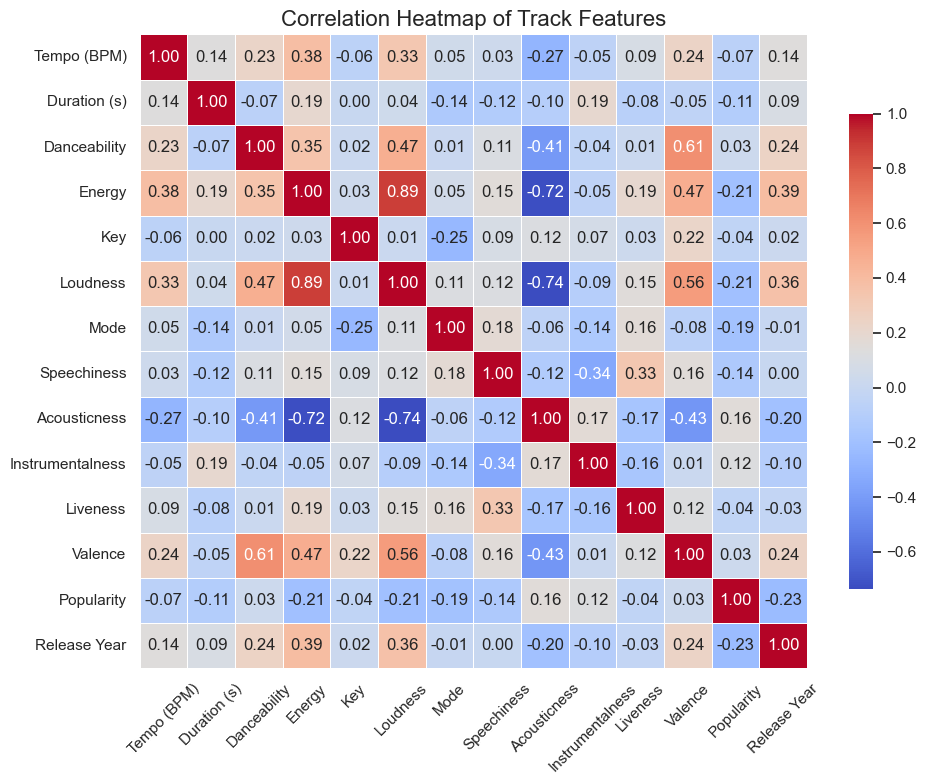

In [119]:
# Replace 'N/A' or 'No data' with NaN
df.replace({'N/A': pd.NA, 'No data': pd.NA}, inplace=True)

# Convert 'Release Date' to datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y-%m-%d', errors='coerce')

# Extract the year from 'Release Date'
df['Release Year'] = df['Release Date'].dt.year

# Define the list of numeric columns, including the new 'Release Year'
numeric_cols = ['Tempo (BPM)', 'Duration (s)', 'Danceability', 'Energy', 
                'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 
                'Instrumentalness', 'Liveness', 'Valence', 'Popularity', 'Release Year']

# Ensure these columns are numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Set the style of the visualization
sns.set(style='white')

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, cbar_kws={"shrink": .75})

# Add titles and labels
plt.title('Correlation Heatmap of Track Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


As we can see in the heatmap above, certain patterns immediately stand out. For example, there is a very strong relationship between loudness and energy (which is not surprising, as Spotify indicates that loudness is one of the features used to measure energy), as well as between valence and danceability. Additionally, there is a very strong negative relationship between energy, acousticness, and loudness.

What also stands out is the moderate correlation between release year and loudness. There are two reasons for this: firstly, releases after 2014 tend to be less ambient, and secondly, if you have been in the audio world for a while, you might be familiar with the term "The loudness war."

The plot below shows a clear trend. We need to factor this in when calculating "Bangerness" to ensure our results reflect the data correctly. Since loudness is used to calculate energy, this could make newer releases seem more "banging.

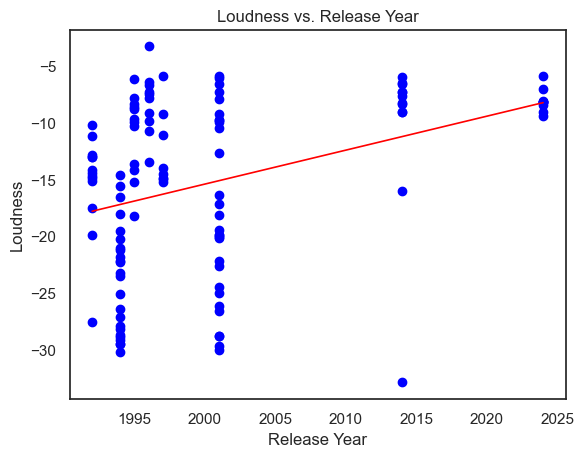

In [120]:
df['Release Year'] = df['Release Date'].dt.year

#Prepare and Fit
X = df[['Release Year']].dropna()  
y = df['Loudness'].dropna()  

model = LinearRegression()
model.fit(X, y)

# Plot points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=1.2)

plt.xlabel('Release Year')
plt.ylabel('Loudness')
plt.title('Loudness vs. Release Year')
plt.show()

To calculate "Bangerness," I use energy, valence, danceability, and negative acousticness. Loudness is adjusted to have more influence on older tracks. I apply intuitive weights to these factors based on insights gained from the dataset. The calculation is:

**Bangerness = (3.6×Energy) + (0.1×Valence) + (0.6×Danceability) + (0.1×AdjustedLoudnessWeight×Loudness) − (0.2×Acousticness)**



In [124]:
# Convert 'Release Date' to a numeric format
df['Release Date Numeric'] = df['Release Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else pd.NA)

# Normalize 'Release Date'
df['ReleaseDateNorm'] = (df['Release Date Numeric'] - df['Release Date Numeric'].min()) / (df['Release Date Numeric'].max() - df['Release Date Numeric'].min())

# Calculate the weight for Loudness
df['AdjustedLoudnessWeight'] = 1 - df['ReleaseDateNorm']

# Calculate the raw Bangerness score with adjusted Loudness weight
df['Bangerness'] = (3.6 * df['Energy'] +
                    0.1 * df['Valence'] +
                    0.6 * df['Danceability'] +
                    0.1 * df['AdjustedLoudnessWeight'] * df['Loudness']) - 0.2 * df['Acousticness']

# Normalize the Bangerness score to the range [0, 1]
min_bangerness = df['Bangerness'].min()
max_bangerness = df['Bangerness'].max()
df['Bangerness'] = (df['Bangerness'] - min_bangerness) / (max_bangerness - min_bangerness)

# Sort DataFrame based on Bangerness
df_sorted = df.sort_values(['Bangerness'], ascending=False)

# Clean Up
df_sorted = df_sorted.drop(columns=['ReleaseDateNorm', 'AdjustedLoudnessWeight', 'Release Date Numeric'])

# Remove Duplicate from the list
df_sorted['First Word'] = df_sorted['Track Name'].str.split().str[0]
df_sorted_unique = df_sorted.drop_duplicates(subset='First Word', keep='first')
df_sorted_unique = df_sorted_unique.drop(columns=['First Word'])

# Display the top 10 tracks 
df_sorted_unique[['Album Name', 'Track Name','Tempo (BPM)', 'Release Date', 'Instrumentalness', 
                  'Popularity', 'Danceability', 'Energy', 'Valence', 'Loudness', 
                  'Acousticness', 'Bangerness']].head(10)

,Album Name,Track Name,Tempo (BPM),Release Date,Instrumentalness,Popularity,Danceability,Energy,Valence,Loudness,Acousticness,Bangerness
9,Digeridoo (Expanded Edition),Flap Head - Cr7E Version,121.014,2024-05-31,0.937,24,0.675,0.994,0.552,-5.840,0.17400,1.000000
7,Digeridoo (Expanded Edition),Phloam - Cr7E Version,132.169,2024-05-31,0.477,24,0.536,0.979,0.191,-8.182,0.00102,0.979356
5,Digeridoo (Expanded Edition),"Digeridoo - Cr7E Version, Live In Cornwall",142.803,2024-05-31,0.900,26,0.525,0.986,0.370,-8.186,0.55500,0.968315
63,Richard D. James Album,Carn Marth,166.895,1996-11-04,0.747,34,0.599,0.997,0.585,-3.264,0.05250,0.957530
17,Syro,CIRCLONT14 [152.97][shrymoming mix],152.969,2014-09-22,0.928,34,0.671,0.978,0.178,-7.304,0.27900,0.949845
3,Digeridoo (Expanded Edition),Isoprophlex - 2022 Remaster,135.609,2024-05-31,0.768,30,0.646,0.914,0.339,-9.003,0.23400,0.949663
20,Syro,s950tx16wasr10 [163.97][earth portal mix],163.990,2014-09-22,0.871,36,0.686,0.920,0.743,-5.977,0.17200,0.937644
19,Syro,PAPAT4 [155][pineal mix],155.019,2014-09-22,0.917,34,0.668,0.914,0.663,-6.606,0.39300,0.922267
36,Drukqs,54 Cymru Beats,168.012,2001-10-22,0.694,35,0.632,0.967,0.390,-6.048,0.01640,0.921096
23,Drukqs,Vordhosbn,170.071,2001-10-22,0.865,44,0.662,0.960,0.605,-6.619,0.04790,0.916346


Above, you can find the top 10 tracks with the highest "Bangerness" score according to my calculation. Here's a link to the playlist:

Listen to the Playlist

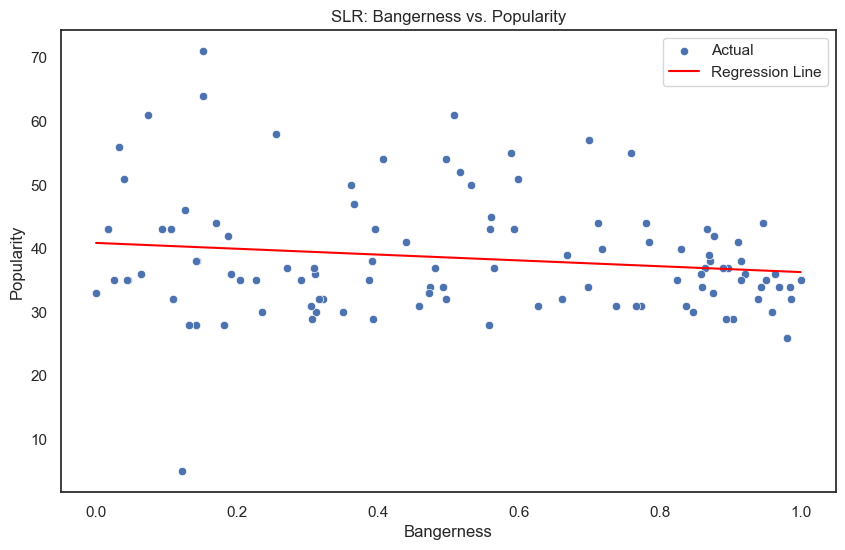

Coefficient (Slope): -4.581700690525728
Intercept: 40.88071290392058
Mean Squared Error (MSE): 87.3488040967682


In [87]:
# Ensure there are no NaN values in the columns
df_sorted_unique = df_sorted_unique.dropna(subset=['Bangerness', 'Popularity'])

# Reshape data for SLR
X = df_sorted_unique[['Bangerness']].values.reshape(-1, 1)  # Bangerness as predictor
y = df_sorted_unique['Popularity'].values  # Popularity as target

# Perform Simple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bangerness', y='Popularity', data=df_sorted_unique, label='Actual')
plt.plot(df_sorted_unique['Bangerness'], y_pred, color='red', label='Regression Line')
plt.title('SLR: Bangerness vs. Popularity')
plt.xlabel('Bangerness')
plt.ylabel('Popularity')
plt.legend()
plt.show()

#SLR results
print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {np.mean((y_pred - y) ** 2)}")


In [88]:
df_sorted = df.sort_values(['Popularity'], ascending=False)
df_sorted.head(10)
df_sorted[['Track Name', 'Popularity', 'Tempo (BPM)', 'Duration (s)', 
            'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 
            'Speechiness', 'Acousticness', 'Instrumentalness', 
            'Liveness', 'Valence', 'Release Date', 'Bangerness']].head(10)

,Track Name,Popularity,Tempo (BPM),Duration (s),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Release Date,Bangerness
39,QKThr,71,79.042,87.467,0.451,0.0223,1,-26.117,1,0.0461,0.99300,0.768,0.1300,0.0573,2001-10-22,0.152366
30,Avril 14th,64,157.811,125.520,0.558,0.0259,8,-30.016,1,0.0458,0.99600,0.871,0.0969,0.3700,2001-10-22,0.151310
105,Xtal,61,114.532,293.752,0.510,0.5050,9,-13.053,0,0.0344,0.34200,0.960,0.1170,0.3180,1992-02-10,0.508336
83,#3,61,146.977,464.293,0.159,0.0710,6,-27.109,0,0.0409,0.91100,0.856,0.1070,0.0602,1994-03-07,0.073793
21,aisatsana [102],58,101.390,321.880,0.260,0.0100,4,-32.894,0,0.0359,0.98000,0.843,0.1310,0.0349,2014-09-22,0.254981
52,Flim,57,147.980,177.093,0.710,0.7340,0,-14.932,0,0.0520,0.51300,0.836,0.0701,0.4000,1997-10-06,0.699488
109,I,56,76.923,77.347,0.183,0.0896,2,-27.540,1,0.0486,0.98900,0.899,0.1070,0.0326,1992-02-10,0.032322
78,Alberto Balsalm,55,93.988,310.747,0.791,0.5990,3,-13.648,1,0.1450,0.31500,0.928,0.1110,0.5700,1995-04-24,0.589080
14,180db_ [130],55,130.064,191.467,0.828,0.6100,1,-7.305,1,0.0648,0.00104,0.894,0.0792,0.5660,2014-09-22,0.759367
107,Pulsewidth,54,119.319,228.053,0.765,0.4860,1,-14.671,1,0.0724,0.42000,0.876,0.3320,0.3030,1992-02-10,0.496381


In [89]:
df_pop = df_sorted.head(10)

Mean Squared Error: 12.90411659354638
R² Score: 0.47883212465483116


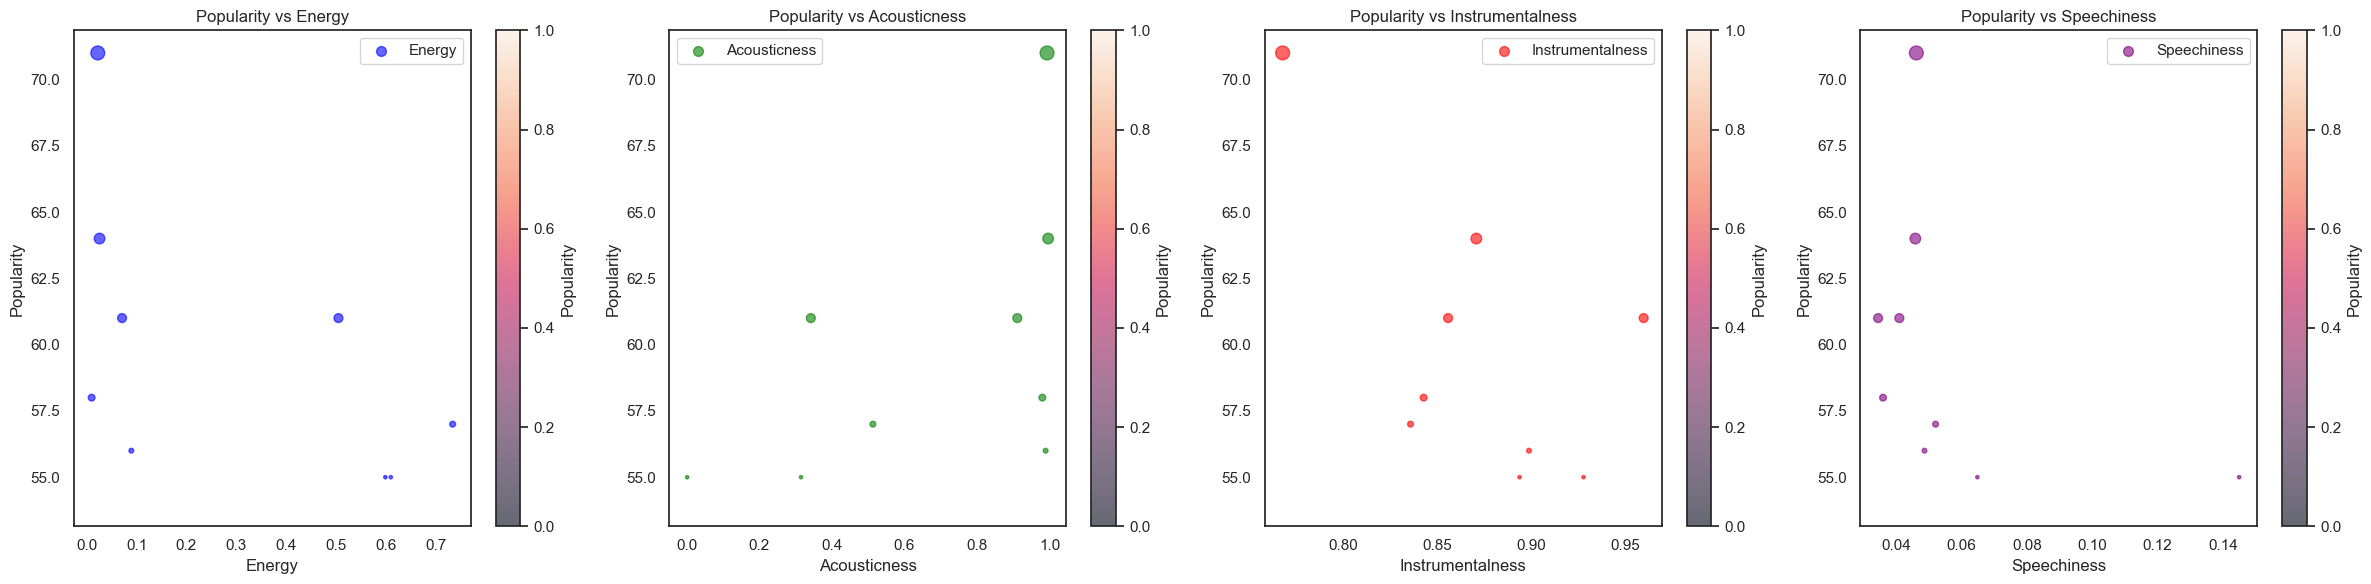

In [90]:
# Prepare the data
X = df_pop[['Energy', 'Acousticness', 'Instrumentalness', 'Speechiness']].values
y = df_pop['Popularity'].values

# Handle missing values and scale features
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Impute missing values
X = imputer.fit_transform(X)

# Scale features
X = scaler.fit_transform(X)

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Scaling for dot sizes
popularity_scaled = (y - y.min()) / (y.max() - y.min()) * 100  # Scale to range 0-100

# Plotting
plt.figure(figsize=(24, 6))

# Scatter plot for Energy vs Popularity
plt.subplot(1, 4, 1)
plt.scatter(df_pop['Energy'], y, c='blue', s=popularity_scaled, alpha=0.6, label='Energy')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.title('Popularity vs Energy')
plt.colorbar(label='Popularity')
plt.legend()

# Scatter plot for Acousticness vs Popularity
plt.subplot(1, 4, 2)
plt.scatter(df_pop['Acousticness'], y, c='green', s=popularity_scaled, alpha=0.6, label='Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.title('Popularity vs Acousticness')
plt.colorbar(label='Popularity')
plt.legend()

# Scatter plot for Instrumentalness vs Popularity
plt.subplot(1, 4, 3)
plt.scatter(df_pop['Instrumentalness'], y, c='red', s=popularity_scaled, alpha=0.6, label='Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Popularity')
plt.title('Popularity vs Instrumentalness')
plt.colorbar(label='Popularity')
plt.legend()

# Scatter plot for Speechiness vs Popularity
plt.subplot(1, 4, 4)
plt.scatter(df_pop['Speechiness'], y, c='purple', s=popularity_scaled, alpha=0.6, label='Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Popularity')
plt.title('Popularity vs Speechiness')
plt.colorbar(label='Popularity')
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
# Ensure all relevant columns are numeric
df_sorted_unique['Energy'] = pd.to_numeric(df_sorted_unique['Energy'], errors='coerce')
df_sorted_unique['Acousticness'] = pd.to_numeric(df_sorted_unique['Acousticness'], errors='coerce')
df_sorted_unique['Instrumentalness'] = pd.to_numeric(df_sorted_unique['Instrumentalness'], errors='coerce')
df_sorted_unique['Speechiness'] = pd.to_numeric(df_sorted_unique['Speechiness'], errors='coerce')
df_sorted_unique['Liveness'] = pd.to_numeric(df_sorted_unique['Liveness'], errors='coerce')
df_sorted_unique['Danceability'] = pd.to_numeric(df_sorted_unique['Danceability'], errors='coerce')

# Handle potential NaN values by filling them with the median of the respective columns
df_sorted_unique.fillna({
    'Energy': df_sorted_unique['Energy'].median(),
    'Acousticness': df_sorted_unique['Acousticness'].median(),
    'Instrumentalness': df_sorted_unique['Instrumentalness'].median(),
    'Speechiness': df_sorted_unique['Speechiness'].median(),
    'Liveness': df_sorted_unique['Liveness'].median(),
    'Danceability': df_sorted_unique['Danceability'].median()
}, inplace=True)

# Invert the scales where lower values should contribute positively to Ambientness
df_sorted_unique['Energy_inverse'] = 1 - df_sorted_unique['Energy']
df_sorted_unique['Speechiness_inverse'] = 1 - df_sorted_unique['Speechiness']
df_sorted_unique['Liveness_inverse'] = 1 - df_sorted_unique['Liveness']
df_sorted_unique['Danceability_inverse'] = 1 - df_sorted_unique['Danceability']

# Calculate the Ambientness score
df_sorted_unique['Ambientness'] = (
    0.20 * df_sorted_unique['Energy_inverse'] +    # Low energy contributes positively
    0.20 * df_sorted_unique['Acousticness'] +      # High acousticness contributes positively
    0.20 * df_sorted_unique['Instrumentalness'] +  # High instrumentalness contributes positively
    0.20 * df_sorted_unique['Speechiness_inverse'] + # Low speechiness contributes positively
    0.10 * df_sorted_unique['Liveness_inverse'] +   # Low liveness contributes positively
    0.10 * df_sorted_unique['Danceability_inverse']  # Low danceability contributes positively
)

# Normalize the Ambientness score to the range [0, 1]
min_ambientness = df_sorted_unique['Ambientness'].min()
max_ambientness = df_sorted_unique['Ambientness'].max()
df_sorted_unique['Ambientness'] = (df_sorted_unique['Ambientness'] - min_ambientness) / (max_ambientness - min_ambientness)

# Display the DataFrame with the new Ambientness column
df_sorted_unique[['Track Name', 'Energy', 'Acousticness', 'Instrumentalness', 
                  'Speechiness', 'Liveness', 'Danceability', 'Ambientness']].head(20)

# Sort by Ambientness and display the top tracks
df_amb = df_sorted_unique.sort_values(['Ambientness'], ascending=False)
df_amb[['Album Name', 'Track Name', 'Popularity', 'Energy', 'Acousticness', 'Instrumentalness', 
       'Speechiness', 'Liveness', 'Danceability', 'Bangerness', 'Valence', 'Ambientness']].head(10)


,Album Name,Track Name,Popularity,Energy,Acousticness,Instrumentalness,Speechiness,Liveness,Danceability,Bangerness,Valence,Ambientness
87,Selected Ambient Works Volume II,#7,43,0.03330,0.994,0.981,0.0371,0.0928,0.161,0.016797,0.0481,1.000000
100,Selected Ambient Works Volume II,#20,51,0.04190,0.971,0.909,0.0418,0.0520,0.108,0.039717,0.0429,0.979681
94,Selected Ambient Works Volume II,#14,35,0.02960,0.992,0.946,0.0502,0.1900,0.124,0.025212,0.0377,0.974684
86,Selected Ambient Works Volume II,#6,35,0.07740,0.995,0.979,0.0423,0.0823,0.226,0.045771,0.0675,0.974336
90,Selected Ambient Works Volume II,#10,33,0.04720,0.974,0.905,0.0419,0.0988,0.105,0.000000,0.0201,0.970315
41,Drukqs,Bit 4,5,0.02320,0.972,0.930,0.0342,0.1400,0.181,0.121508,0.0000,0.969025
80,...I Care Because You Do,Next Heap With,28,0.08530,0.962,0.918,0.0403,0.0939,0.109,0.181982,0.0364,0.958716
45,Drukqs,Petiatil Cx Htdui,43,0.00682,0.996,0.956,0.0391,0.1540,0.421,0.106247,0.1390,0.947342
85,Selected Ambient Works Volume II,#5,36,0.09910,0.965,0.938,0.0434,0.0445,0.250,0.064487,0.0398,0.945578
109,Selected Ambient Works 85-92,I,56,0.08960,0.989,0.899,0.0486,0.1070,0.183,0.032322,0.0326,0.942782


Mean Squared Error: 0.016884095021942713
R² Score: 0.7834637433863464


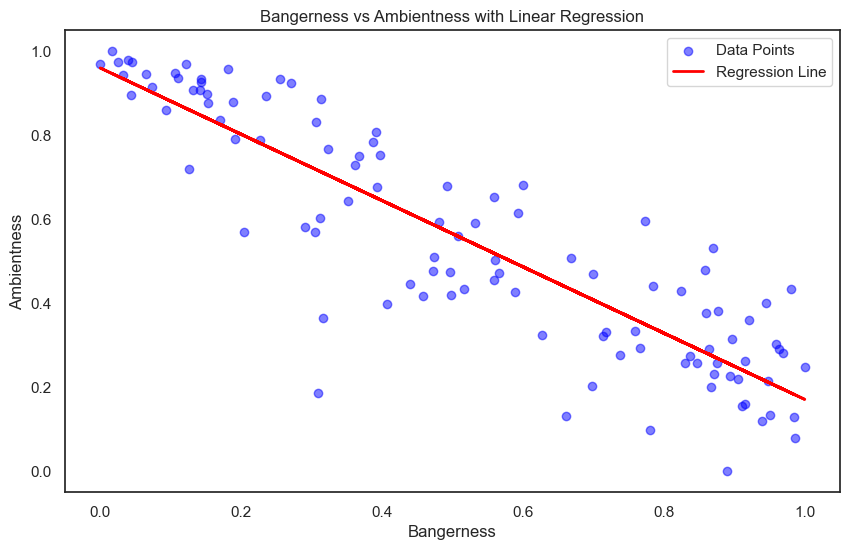

In [92]:
# Prepare the data
X = df_amb['Bangerness'].values.reshape(-1, 1)  # Independent variable
y = df_amb['Ambientness'].values  # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Bangerness')
plt.ylabel('Ambientness')
plt.title('Bangerness vs Ambientness with Linear Regression')
plt.legend()
plt.show()


looking into entries in the middle = selected ambient works

In [28]:
df_fin = df_amb[['Album Name', 'Track Name', 'Popularity', 'Energy','Danceability', 'Acousticness', 'Instrumentalness', 
                  'Speechiness', 'Liveness','Valence', 'Bangerness', 'Ambientness']]

df_fin_filtered = df_fin[
    ((df_fin['Bangerness'] - df_fin['Ambientness']).abs() < 0.0666) &
    (df_fin['Bangerness'] > 0.38) &
    (df_fin['Ambientness'] > 0.38)
]

df_fin_filtered

,Album Name,Track Name,Popularity,Energy,Danceability,Acousticness,Instrumentalness,Speechiness,Liveness,Valence,Bangerness,Ambientness
62,Richard D. James Album,Fingerbib,51,0.564,0.619,0.871000,0.926,0.0293,0.1600,0.787,0.623855,0.681145
28,Drukqs,Bbydhyonchord,43,0.447,0.804,0.666000,0.960,0.0938,0.1430,0.883,0.613499,0.614131
111,Selected Ambient Works 85-92,Heliosphan,50,0.612,0.345,0.455000,0.956,0.0416,0.0854,0.126,0.538914,0.591131
105,Selected Ambient Works 85-92,Xtal,61,0.505,0.510,0.342000,0.960,0.0344,0.1170,0.318,0.515238,0.560321
16,Syro,fz pseudotimestretch+e+3 [138.85],34,0.183,0.564,0.350000,0.534,0.0563,0.1320,0.390,0.464075,0.509887
70,...I Care Because You Do,The Waxen Pith,33,0.423,0.541,0.077400,0.903,0.0316,0.1180,0.372,0.463185,0.476661
107,Selected Ambient Works 85-92,Pulsewidth,54,0.486,0.765,0.420000,0.876,0.0724,0.3320,0.303,0.501984,0.474278
116,Selected Ambient Works 85-92,Delphium,41,0.371,0.654,0.020400,0.923,0.0907,0.1010,0.710,0.429265,0.446182
92,Selected Ambient Works Volume II,#12,31,0.482,0.234,0.000279,0.850,0.1480,0.1690,0.172,0.464339,0.417913
108,Selected Ambient Works 85-92,Ageispolis,54,0.393,0.645,0.009030,0.890,0.0430,0.3640,0.441,0.398696,0.397975


Looking into entries with low amb /bang vals

In [99]:
df_filtered_small = df_fin[(df_fin['Bangerness'] < 0.38) & (df_fin['Ambientness'] < 0.38)]
df_filtered_small

,Album Name,Track Name,Popularity,Energy,Danceability,Acousticness,Instrumentalness,Speechiness,Liveness,Valence,Bangerness,Ambientness
32,Drukqs,Gwarek2,32,0.235,0.288,0.0704,0.512,0.179,0.335,0.0379,0.274304,0.364342
39,Drukqs,Lornaderek,37,0.144,0.758,0.9890,0.000,0.913,0.461,0.7200,0.318415,0.187491
